<a href="https://colab.research.google.com/github/UdayChaudhary1/Important-Implementations/blob/main/Implementing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [351]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

In [387]:
df = pd.read_csv('/content/salary_data.csv')

In [388]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [389]:
class LinearRegression():

   def __init__( self, learning_rate, no_of_iterations ) :

        self.learning_rate = learning_rate

        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # initiating the weight and bias

        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # implementing Gradient Descent for Optimization

        for i in range( self.no_of_iterations ) :

            self.update_weights()



    # function to update weights in gradient descent

   def update_weights( self ) :

        Y_prediction = self.predict( self.X )

        # calculate gradients

        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:

   def predict( self, X ) :

        return X.dot( self.w ) + self.b

In [390]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [391]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [392]:
model = LinearRegression(learning_rate = 0.02, no_of_iterations=1000)
model.fit(X_train, y_train)

In [393]:
# Predictions and Metrics
training_data_prediction = model.predict(X_train)
test_data_prediction = model.predict(X_test)

In [394]:
# Calculate metrics
training_r2 = metrics.r2_score(y_train, training_data_prediction)
training_mae = metrics.mean_absolute_error(y_train, training_data_prediction)
test_r2 = metrics.r2_score(y_test, test_data_prediction)
test_mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [395]:
print("Training R Squared Error: ", training_r2)
print("Training Mean Absolute Error: ", training_mae)
print("Test R Squared Error: ", test_r2)
print("Test Mean Absolute Error: ", test_mae)

Training R Squared Error:  0.9654753351440064
Training Mean Absolute Error:  4077.774682852143
Test R Squared Error:  0.88863795514416
Test Mean Absolute Error:  6804.242019561192


In [396]:
#Accuracy in predicting testing data
test_data_prediction = model.predict(X_test)

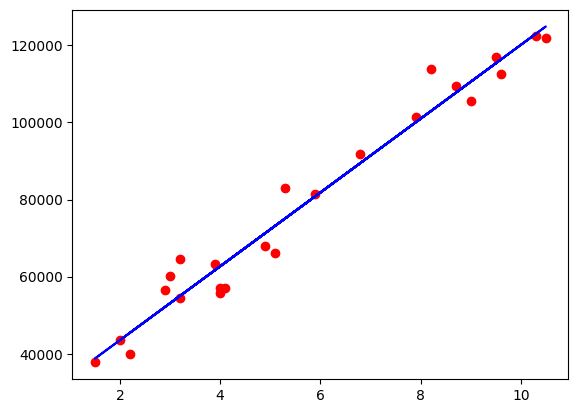

In [397]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, training_data_prediction, color='blue')
plt.show()